**Exercise a)**

If we assume the contrary: $θ*$ maximizes $log(L(D, θ))$ but does not maximize the function $L(D, θ)$, we are argueing that there is another value of $θ (θ')$ that makes $L(D, θ') > L(D, θ*)$.

If we take logs we have that $log(L(D, θ')) > log(L(D, θ*))$.

But since we assumed that $θ*$ maximizes $log(L(D, θ))$, we should have that $log(L(D, θ*)) ≥ log(L(D, θ'))$

We can see that the result we got in the first place contradicts our assumption. 

The assumption that $θ*$ maximizes $log(L(D, θ))$ without maximizing $L(D, θ)$ does not hold.

Therefore we have proved that $θ*$ maximizes $L(D, θ)$ if and only if it maximises $log(L(D, θ))$.

**Exercise b)**

We prefer working with log-likelihood funtions instead of the regular likelihood because log functions are usually "well-behaved", meaning the f''(x) does not change too rapidly, and you get a quadratic function that it is easier to optimise.
Another advantge is due to the fact that computers have a limited decimal representations, and when we multiply many probabilities, this will become very close to zero. With logs we avoid this issue.

**Exercise c)**

We assume that y is a binary variable: it can only take the values 0 or 1. 
The sum of the probabilites for all possible outcomes is equal to 1, therefore the probability of y=0 given the parameters X and θ is equal to $1-Pr(y=1|X,θ)$

$Pr(y=0|X, θ)=\frac{exp(Xθ)}{1+exp(Xθ)}$

**Exercise d)**

Since y is binary, we can write the probabilities of y=1 and y=0.

$Pr(y = 1|X, θ) = p(X, θ)$, 

$Pr(y = 0|X, θ) = 1 - p(X, θ)$

Now we use the probabilities to write the likelihood expression

$L(y, X, θ) = p(X, θ)^y * (1 - p(X, θ))^(1-y)$

We take log and apply the log properties to get:

$log L(y, X, θ) = y * log p(X, θ) + (1-y) * log(1 - p(X, θ))$


**Exercise e)**

The gradient of the log-likelihood formula is the first derivative with respect to θ:

$\frac{δlog(D,θ)}{δθ}= [yi-p(Xi,θ)]x$

The Hessian of the log-likelihood formula is the second derivative with respect to θ:

$\frac{δ^2log(D,θ)}{δ^2θ}=x(p(X,θ))(1-p(X,θ))$


In [112]:
# import libaries and set the seed
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
np.random.seed(10)


**Exercise f)**

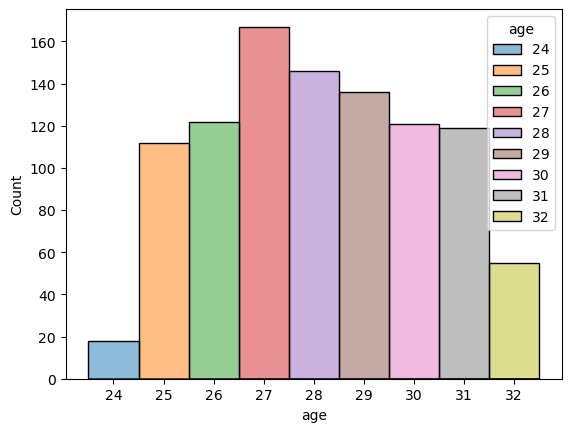

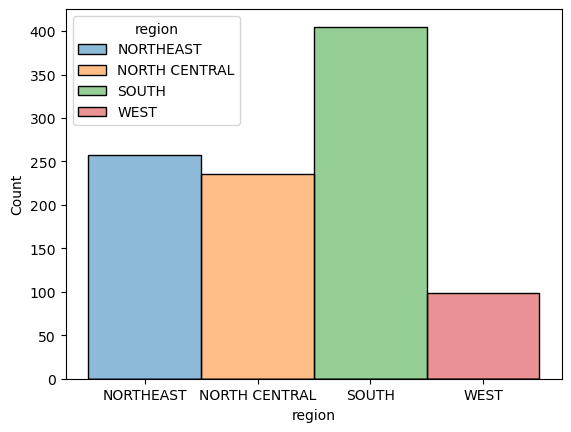

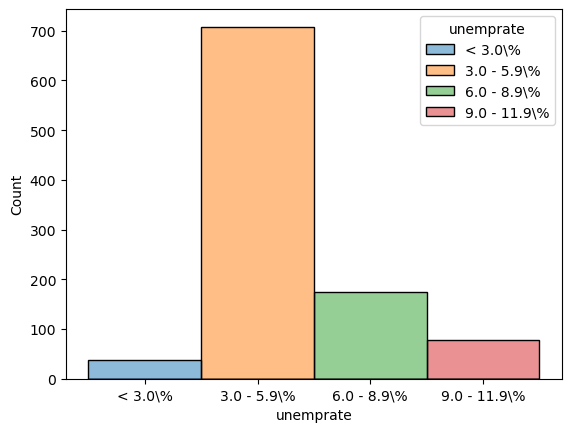

In [104]:
df = pd.read_stata("/Users/susanawang/Desktop/data.dta")
#plot the age distribution
sns.histplot(x='age', data=df, hue='age')
plt.show()
#plot the region distribution
sns.histplot(x='region', data=df, hue='region')
plt.show()
sns.histplot(x='unemprate', data=df, hue='unemprate')
plt.show()

**Exercise g)**

In [114]:
#create dummies for non-continuous variables
def dummy(df, dummyname, column):
    if column=="welfare":
        df[dummyname]=1*(df[column]=="YES")
    if column=="eduyrs":
        df[dummyname]=1*(df[column].str.contains("COL"))
    if column=="race":
        df[dummyname]=1*(df[column]=="WHITE")
    if column=="sex":
        df[dummyname]=1*(df[column]=="FEMALE")
    if column=="empstat":
        df[dummyname]=1*(df[column]=="EMPLOYED")
    if column=="region":
        df[dummyname]=1*(df[column]=="WEST")
    if column=="marital":
        df[dummyname]=1*(df[column]=="MARRIED")
    if column=="urban":
        df[dummyname]=1*(df[column]=="URBAN")
    if column=="unemprate":
        df[dummyname]=1*(df[column]=="<3.0\%")
    return df

dummy (df,"welfare_dummy", "welfare")
dummy (df,"college_dummy", "eduyrs")
dummy (df,"white_dummy", "race")
dummy (df,"female_dummy", "sex")
dummy (df,"employed_dummy", "empstat")
dummy (df,"west_dummy", "region")
dummy (df,"married_dummy", "marital")
dummy (df,"urban_dummy", "urban")
dummy (df,"low_unemployment_dummy", "unemprate")
df

,IQ,wage,childsupp,welfare,race,tenure,sex,famsize,empstat,region,...,marital_dummy,urban_dummy,unemprate_dummy,low_unemployment_dummy,college_dummy,white_dummy,female_dummy,employed_dummy,west_dummy,married_dummy
0,105,1282.0,0,NO,WHITE,162,MALE,3,EMPLOYED,NORTHEAST,...,1,1,0,0,0,1,0,1,0,1
1,112,1081.0,0,NO,WHITE,523,FEMALE,2,EMPLOYED,NORTHEAST,...,1,1,0,0,1,1,1,1,0,1
2,137,-4.0,0,NO,WHITE,-4,FEMALE,3,OUT OF LABOR FORCE,NORTHEAST,...,1,0,0,0,1,1,1,0,0,1
3,114,1009.0,0,NO,WHITE,375,FEMALE,3,EMPLOYED,NORTHEAST,...,1,0,0,0,0,1,1,1,0,1
4,90,1237.0,0,NO,WHITE,158,FEMALE,2,EMPLOYED,NORTHEAST,...,1,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,33,921.0,0,NO,WHITE,169,FEMALE,4,EMPLOYED,NORTHEAST,...,1,1,0,0,0,1,1,1,0,1
992,116,750.0,1872,NO,WHITE,88,FEMALE,7,EMPLOYED,NORTH CENTRAL,...,1,0,0,0,0,1,1,1,0,1
993,105,800.0,0,NO,WHITE,9,FEMALE,3,EMPLOYED,NORTH CENTRAL,...,1,0,0,0,1,1,1,1,0,1
994,112,1081.0,0,NO,WHITE,32,MALE,2,EMPLOYED,NORTH CENTRAL,...,1,1,0,0,1,1,0,1,0,1


In [119]:
# We set the X and Y as indicated.
X = df[['age', 'white_dummy', 'married_dummy', 'famsize', 'college_dummy', 'IQ', 'childsupp', 'welfare_dummy','female_dummy', 'west_dummy', 'urban_dummy', 'low_unemployment_dummy']]
y = df['employed_dummy']

**Exercise h)**

In [124]:
# Define the log-likelihood function for linear regression
def linear_regression_log_likelihood(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    logl = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    return -logl

def probability_of_0(x):
    return np.exp(x) / (1 + np.exp(x))

def gradient(thetas, X, y):
    p = probability_of_0(X.dot(thetas))
    gradient = (y-p)*x
    return gradient

def hessian(thetas, X, y):
    p = probability_of_0(X.dot(thetas))
    hessian= X*p*(1-p)
    return hessian